In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


In [13]:
# agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [22]:
# create line
weight = 0.3
bias = 0.9
X = torch.arange(start=0, end=1, step=0.01, device=device)
y = weight*X + bias

In [30]:
# create train/test split
idx_split = int(len(X)*0.8)
X_train = X[:idx_split]
y_train = y[:idx_split]
X_test = X[idx_split:]
y_test = y[idx_split:]

In [33]:
X_train.shape, X_test.shape

(torch.Size([80]), torch.Size([20]))

In [51]:
def scatter_plot(X_train, X_test, y_train, y_test, predictions=None):
  plt.scatter(x=X_train, y=y_train, marker='^', c="b")
  plt.scatter(x=X_test, y=y_test, marker='*', c="r")
  if predictions is not None:
    plt.scatter(x=X_test, y=predictions, marker='*', c="m")

  plt.legend(['train', 'test', 'predictions'])
  plt.show()

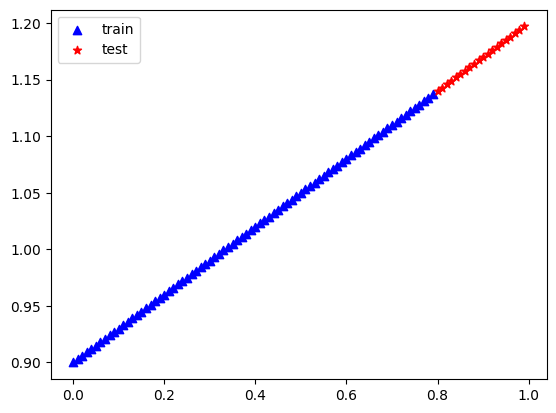

In [54]:
scatter_plot(X_train, X_test, y_train, y_test)

In [81]:
# build a new class
class LinearRegressionX(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1), requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1), requires_grad=True)
  def forward(self, x):
    return self.weight*x + self.bias

In [82]:
modelx = LinearRegressionX()

In [83]:
modelx.state_dict()

OrderedDict([('weight', tensor([0.7017])), ('bias', tensor([0.3987]))])

In [84]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=modelx.parameters(), lr=0.01)

In [85]:
# training/test loop
epochs = 300
epochs_step = 20

for epoch in range(epochs):
  # preparati per il train
  modelx.train()
  # fai predizione
  y_pred = modelx(X_train)
  # valuta la predizione
  loss_train = loss_func(y_pred, y_train)
  # azzera il gradiente
  optimizer.zero_grad()
  # calcola il gradiente della loss rispetto ai pesi
  loss_train.backward()
  # aggiorna i pesi
  optimizer.step()

  # preparati per il test
  modelx.eval()
  with torch.inference_mode():
    y_pred_test = modelx(X_test)
    loss_test = loss_func(y_pred_test, y_test)

  if epoch % epochs_step == 0:
    print(f"{epoch} - Train loss {loss_train} | Test loss {loss_test}")

0 - Train loss 0.34264907240867615 | Test loss 0.128243088722229
20 - Train loss 0.13533441722393036 | Test loss 0.12039818614721298
40 - Train loss 0.0995025709271431 | Test loss 0.19423945248126984
60 - Train loss 0.09054930508136749 | Test loss 0.20235271751880646
80 - Train loss 0.0835345983505249 | Test loss 0.19225239753723145
100 - Train loss 0.07668056339025497 | Test loss 0.17695720493793488
120 - Train loss 0.06982653588056564 | Test loss 0.1616620123386383
140 - Train loss 0.06297250837087631 | Test loss 0.14636678993701935
160 - Train loss 0.056118469685316086 | Test loss 0.13107168674468994
180 - Train loss 0.049264438450336456 | Test loss 0.11577650159597397
200 - Train loss 0.04241332784295082 | Test loss 0.09944938868284225
220 - Train loss 0.03556215763092041 | Test loss 0.08312192559242249
240 - Train loss 0.028709983453154564 | Test loss 0.06713832914829254
260 - Train loss 0.021858777850866318 | Test loss 0.05081075429916382
280 - Train loss 0.01500758994370699 | Te

In [86]:
modelx.state_dict()

OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.8829]))])

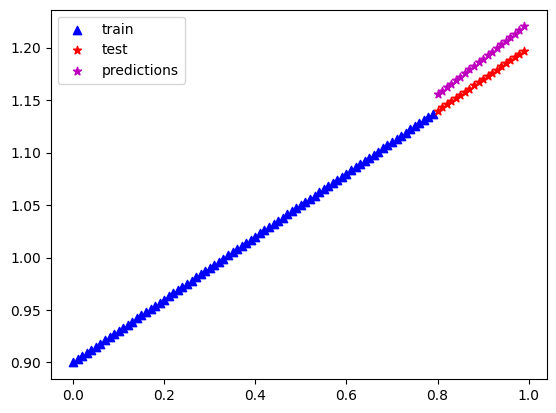

In [87]:
modelx.eval()
with torch.inference_mode():
  final_pred = modelx(X_test)


scatter_plot(X_train, X_test, y_train, y_test, predictions=final_pred)

In [88]:
# crea cartella di salvataggio
mpath = Path("ese-models")
mpath.mkdir(parents=True, exist_ok=True)

# file
model_save_path = mpath / "01_ese_modelx.pth"
# salva modello
torch.save(modelx.state_dict(), model_save_path)

In [89]:
model_save_path

PosixPath('ese-models/01_ese_modelx.pth')

In [91]:
# nuova istanza
extra_model = LinearRegressionX()
print(extra_model.state_dict())

OrderedDict([('weight', tensor([0.1687])), ('bias', tensor([0.4285]))])


In [92]:
extra_model.load_state_dict(torch.load(model_save_path))
print(extra_model.state_dict())

OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.8829]))])


In [93]:
extra_model.eval()
with torch.inference_mode():
  extra_final_pred = extra_model(X_test)

extra_final_pred == final_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])